In [2]:
%%HTML
<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

<a href="javascript:code_toggle()">[Toggle Code]</a>

## Linear Supervised Learning Series

# Part 1: Linear regression

In this post we formally describe the problem of *linear regression*, or the fitting of a representative line (or hyperplane in higher dimensions) to a set of input/output data points. Regression in general may be performed for a variety of reasons: to produce a so-called trend line (or - more generally - a curve) that can be used to help visually summarize, drive home a particular point about the data under study, or to learn a model so that precise predictions can be made regarding output values in the future.

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
import autograd.numpy as np
import math
import pandas as pd
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

# 1.  Linear regression

With linear regression we aim to fit a line (or hyperplane in higher dimensions) to a scattering of data. In this Section we describe the fundamental concepts underlying this procedure. 

## 1.1  Notation and modeling

Data for regression problems comes in the form of a set of
$P$ input/output observation pairs

\begin{equation}
 \left(\mathbf{x}_{1},y_{1}\right),\,\left(\mathbf{x}_{2},y_{2}\right),\,...,\,\left(\mathbf{x}_{P},y_{P}\right)
\end{equation}

or $\left\{ \left(\mathbf{x}_{p},y_{p}\right)\right\} _{p=1}^{P}$ for short, where $\mathbf{x}_{p}$ and $y_{p}$ denote the $p^{\textrm{th}}$ input and output respectively. 

In general each input $\mathbf{x}_{p}$ may be a column vector of length $N$

\begin{equation}
\mathbf{x}_{p}=\left[\begin{array}{c}
x_{1,p}\\
x_{2,p}\\
\vdots\\
x_{N,p}
\end{array}\right]
\end{equation}

in which case the linear regression problem is analogously one of fitting a hyperplane to a scatter of points in $N+1$ dimensional space. 

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_1_new.png' width="95%" height="auto" alt=""/>
</figure>

In the case of scalar input the fitting of a line to the data requires we determine a vertical intercept $w_0$ and slope $w_1$ so that the following approximate linear relationship
holds between the input/output data

\begin{equation}
w_{0}+x_{p}w_{1}\approx y_{p},\quad p=1,...,P.
\end{equation}

More generally, when dealing with $N$ dimensional input we have a bias and $N$ associated slope weights to tune properly in order to fit a hyperplane, with the analogous linear relationship written as

\begin{equation}
w_{0}+ x_{1,p}w_{1} + x_{2,p}w_{2} + \cdots + x_{N,p}w_{N} \approx y_{p} ,\quad p=1,...,P.
\end{equation}

For any $N$ we can write the above more compactly by denoting

\begin{equation}
\mathbf{w}=\left[\begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{N}
\end{array}\right]
\end{equation}

as

\begin{equation}
w_0+\mathbf{x}_{p}^T\mathbf{w} \approx y_{p} ,\quad p=1,...,P.
\end{equation}

The elements of an input vector $\mathbf{x}_{p}$ are referred to as *input features* to a regression problem.  In the McDonald's revenue history dataset data described in the first post of our *basics of mathematical functions* series, the input feature was *year*.  Conversely in the GDP growth rate data described in the Example below the first element of the input feature vector might contain the feature *unemployment rate* (that is, the unemployment data from each country under study), the second might contain the feature *education level*, and so on. 

#### <span style="color:#a50e3e;">Example 1: </span> Predicting Gross Domestic Product (GDP) growth rates

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_2.png' width="70%" height="60%" alt=""/>
  <figcaption>   
<strong>Figure 2:</strong> <em>  A map of the world where countries are color-coded by their GDP growth rates (the darker the color the higher the growth rate) as reported by the International Monetary Fund (IMF) in 2013.  </em>  </figcaption> 
</figure>

Economists are often interested in understanding factors (e.g., unemployment rate, education level, population count, land area, income level, investment rate, life expectancy, etc.,) which determine a country's GDP growth rate in order to inform better financial policy making. To understand how these various features of a country relate to its GDP growth rate economists often perform linear regression.

In the Figure below we show a heat map of the world where countries are color-coded based on their GDP growth rate in 2013, as reported by the International Monetary Fund (IMF).

## 1.2  The Least Squares cost function

To find the parameters of the hyperplane which best fits a regression dataset, it is common practice to first form the *Least Squares cost function*. For a given set of parameters $\mathbf{w}$ this cost function computes the total squared error between the associated hyperplane and the data.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Least_Squares.png' width="90%" height="auto" alt=""/>
</figure>

We want to find a weight vector $\mathbf{w}$ and the bias $w_0$ so that each of following $P$ approximate equalities holds as well as possible. 

\begin{equation}
w_0+\mathbf{x}_{p}^T\mathbf{w} \approx y_{p}
\end{equation}

Another way of stating the above is to say that the *error* between $w_0+\mathbf{x}_{p}^{T}\mathbf{w}$ and $y_{p}$ is small. 

\begin{equation}
\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w} - y_{p}^{\,}\right)^2
\end{equation}

\begin{equation}
\,g\left(w_0,\mathbf{w}\right)=\sum_{p=1}^{P}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}^{\,}\right)^{2}
\end{equation}

We want to find parameters $w_0$ and $\mathbf{w}$ that provide a small value for $g\left(w_0,\mathbf{w}\right)$ since the larger this value becomes the larger the squared error between the corresponding linear model and the data, and hence the poorer we represent the given dataset using a linear model. In other words, we want to determine a value for the pair $w_0$ and $\mathbf{w}$ that *minimizes* $g\left(w_0,\mathbf{w}\right)$, or written formally we want to solve the unconstrained problem

\begin{equation}
\underset{w_0,\,\mathbf{w}}{\mbox{minimize}}\,\,\underset{p=1}{\overset{P}{\sum}}\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}-y_{p}^{\,}\right)^{2}
\end{equation}

## 1.3  Minimization of the Least Squares cost function

As discussed in our *mathematical optimization series*, generally speaking determining the overall shape of a function - i.e., whether or not a function is convex - helps determine the appropriate optimization method(s) we can apply to efficiently determine the ideal parameters.  In the case of the Least Squares cost function for linear regression it is easy to check that *the cost function is always convex regardless of the dataset*.  

For small input dimensions (e.g., $N=1$) we can empirically verify this claim for any given dataset by simply plotting the function $g$ - as a surface and/or contour plot - as we do in the example below.

#### <span style="color:#a50e3e;">Example 2: </span> Visually verifying the convexity of the cost function for a toy dataset

In this example we plot the contour and surface plot for the Least Squares cost function for linear regression for a toy dataset.  This toy dataset consists of 50 points randomly selected off of the line $y = x$, with a small amount of Gaussian noise added to each.  

<IPython.core.display.Javascript object>


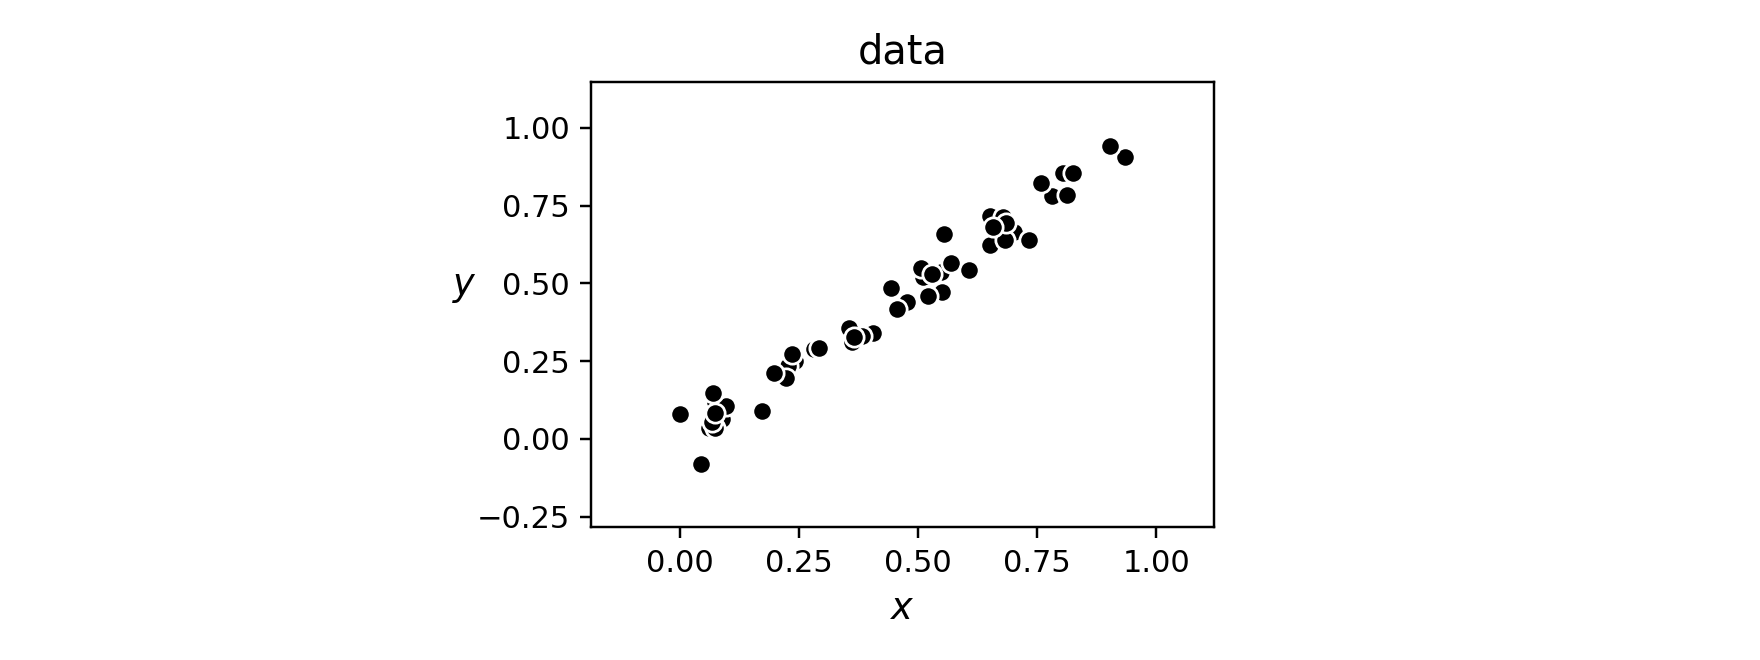

In [2]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/2d_linregress_data.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# create instance of linear regression demo, used below and in the next examples
demo1 = superlearn.lin_regression_demos.Visualizer(data)

# plot dataset
demo1.plot_data()

The contour plot and corresponding surface generated by the Least Squares cost function using this data are shown below.  

<IPython.core.display.Javascript object>


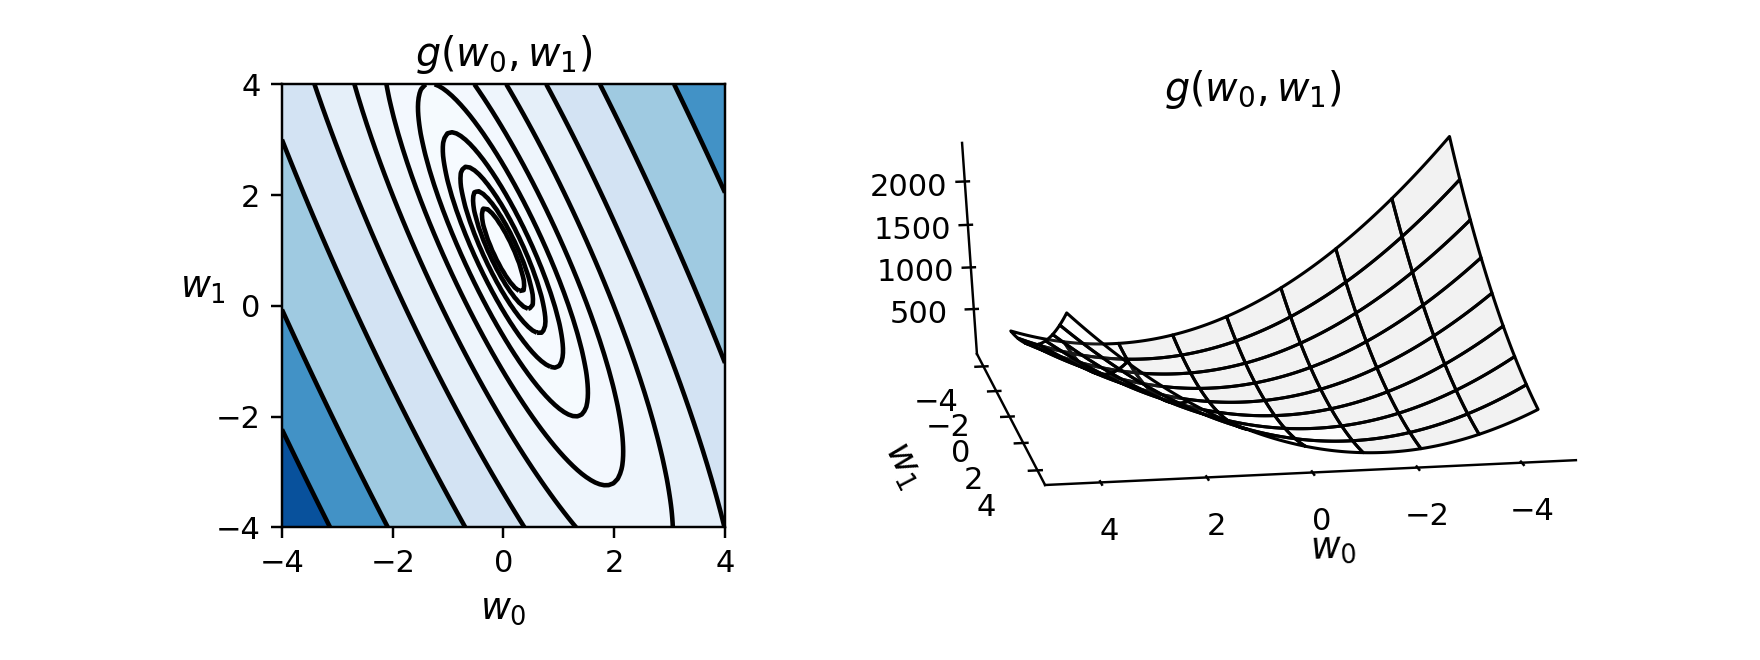

In [4]:
# demo.center_data()
demo1.plot_ls_cost(view = [30,80],viewmax = 4,num_contours = 30)

----

In the previous example we plotted the contour/surface for the Least Squares cost function for linear regression on a specific dataset. There we saw the elliptical contours and 'upward bending' shape of the surface indeed confirms the function's convexity in that case. However the Least Squares cost function for linear regression can mathematically shown to be  - in general - a convex function for *any dataset*. Because of this we can directly apply either gradient descent (and in particular the *unnormalized* form) or Newton's method in order to minimize it. 

> The Least Squares cost function for linear regression is always convex regardless of the input dataset, hence we can easily apply either gradient descent or Newton's method in order to minimize it.

The generic practical considerations associated with each method still exist here (see our Mathematical Optimization Series): i.e., with gradient descent we must choose a steplength scheme, and Newton's method is practically limited to cases when $N$ is of moderate value (e.g., in the thousands). For the case of gradient descent we can use a fixed steplength value (and indeed can compute a conservative Lipschitz value that will always produce descent), a diminishing steplength scheme, or an adjustable method like backtracking line search.

#### <span style="color:#a50e3e;">Example 3: </span> Using gradient descent to minimize the Least Squares cost on our toy dataset

The simplest way to code up gradient descent in the same manner as shown above is to simply take the generic unnormalized gradient descent Python code provided in Part 2 of our *series on mathematical optimization*, and simply plug in the Least Squares cost function. Here the automatic differentiator [autograd](https://github.com/HIPS/autograd) is used to efficiently compute the gradient at each step. One can implement the cost function in Python as shown in the next Python cell.

In [3]:
# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
x = data[:,0]    # define input of dataset prior to function definition
y = data[:,1]    # define output of dataset prior to function definition
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
            cost +=(w[0] + w[1]*x[p] - y[p])**2
    return cost

Note that because autograd will differentiate with respect to any input to a Python function, officially the only input here can be the weights ```w```.  The input/output data ```x``` and ```y``` should be loaded in prior to defining the function, so that they are included in the scope of the Least Squares implementation, but treated as weights by autograd.  Note also that autograd gradient requires input weights be of type <code>autograd.numpy</code>.

Using the implementation above we can evaluate any set of weights we like.

In [7]:
# test out a set of weights using our implementation of the N = 2 least squares function
w = [0,1]
least_squares(w)

0.11438129466751287

To deal with arbitrary input dimension $N$ one then only needs to replace the cost update inside the for loop, i.e., ```cost +=(w[0] + w[1]*x[p] - y[p])**2```, with the more general form.

Alternatively one can 'hard code' the gradient, writing it out algebraically and implementing the same thing in code. Using the more compact notation

\begin{equation}
\widetilde{\mathbf{w}}=\left[\begin{array}{c}
w_{0}\\
\mathbf{w}
\end{array}\right]
\,\,\,\,\text{and}\,\,\,\,\,
\widetilde{\mathbf{x}}_{p}=\left[\begin{array}{c}
1\\
\mathbf{x}_{p}
\end{array}\right]
\end{equation}


one can easily compute the general form of the gradient by hand (using the derivative rules detailed in our *vital elements of calculus series*) to be

\begin{equation}
\nabla g\left(\widetilde{\mathbf{w}}\right) = 2\sum_{p=1}^{P} \widetilde{\mathbf{x}}_p^{\,}\left(\widetilde{\mathbf{x}}_p^T \widetilde{\mathbf{w}}_{\,}^{\,} - y_p^{\,}\right)
\end{equation}

In the next Python cell minimize the Least Squares cost using the toy dataset presented in Example 2.  In particular since the function is convex we use unnormalized gradient descent, and employ a fixed steplength value $\alpha = 0.01$ for all 75 
steps until approximately reaching the minimum of the function.  Here we employ the file ``optimizers.py`` which contains a short list of optimization algorithms discussed in our series on *mathematical optimization*, including gradient descent and Newton's method.

In [17]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_hist = opt.gradient_descent(g = least_squares,w = [-1,-2],max_its = 75,alpha = 10**-2)

Now we animate the process of gradient descent run above.  The contour of the cost function is shown in the right panel with each step plotted on top, colored from green at the start of the run to red at its end (green and red points mark the initialization and final weights reached by gradient descent).  As you move the slider from left to right the gradient descent process animates, until completion when the slider is all the way to the right. Simultaneously, in the left panel the corresponding linear model given by the weights at each step of gradient descent is drawn. The linear model is colored to match the step of gradient descent, so near the beginning of the run the line is green whereas near the end it is plotted red.  

As can be seen while pushing the slider to the right, as the minimum of the cost function is neared, the corresponding weights provide a better and better fit to the data - with the best fit occurring at the end of the run (at the point closest to the minimum).

In [4]:
# animate descent process
demo1.animate_it_2d(w_hist,num_contours = 30)

NameError: name 'demo1' is not defined

#### <span style="color:#a50e3e;">Example 4: </span> Using Newton's method to minimize the Least Squares cost on our toy dataset

In Example 6 of our post on Newton's method in our *series on mathematical optimization* we described how Newton's method perfectly minimizes any quadratic function in a single step.  By re-writing it one can show that Least Squares cost function

$$
\,g\left(\widetilde{\mathbf{w}}\right)=\sum_{p=1}^{P}\left(\widetilde{\mathbf{x}}_{p}^{T}\widetilde{\mathbf{w}}-y_{p}^{\,}\right)^{2}
$$

with any dataset and any $N$, is always a quadratic function, hence Newton's method can be used to minimize it in a single step. Specifically, the cost function can be equivalently rewritten as 


$$
g(\widetilde{\mathbf{w}}) = \widetilde{\mathbf{w}}^T \mathbf{A}^{\,} \widetilde{\mathbf{w}} + \mathbf{b}^T \widetilde{\mathbf{w}} + c
$$

where 

\begin{equation}
\mathbf{A} = \sum_{p=1}^{P}\widetilde{\mathbf{x}}_{p}^{\,} \widetilde{\mathbf{x}}_{p}^T   \,\,\,\,\,\,\,\,\,\,\,\,\,\mathbf{b} = -2\sum_{p=1}^{P}\widetilde{\mathbf{x}}_{p}^{\,}y_p^{\,} \,\,\,\,\,\,\,\,\,\,\,\,\, c = \sum_{p=1}^{P}y_p^2
\end{equation}

We illustrate the fact that Newton's method can fit a linear regression in a single step below using the same setup as in the previous example, except Newton's method is now used instead of gradient descent.  Indeed it takes only a single step to reach the minimum of the cost, while simultaneously finding a set of weights that produces a perfectly fitting line.

In [19]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_hist = opt.newtons_method(g = least_squares,w = [-1,-2],max_its = 1)


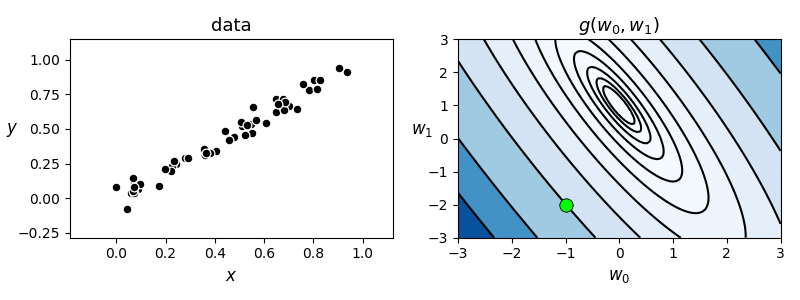
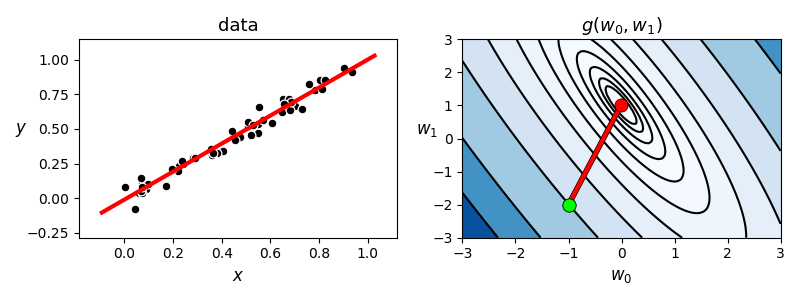

In [21]:
# animate descent process
demo1.animate_it_2d(w_hist,num_contours = 30)

As with gradient descent, one can repeat this experiment by taking the Newton's method code provided in our *series on mathematical optimization* - which also uses the autograd automatic differentiator - and simply plug in the Python implementation of the Least Squares cost function given in the previous example.

Alternatively if one wishes to write out the Newton step analytically it can be shown to reduce to the following system of linear equations

\begin{equation}
\left(\sum_{p=1}^{P} \widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T \right) \widetilde{\mathbf{w}}_{\,}^{\,} =  \sum_{p=1}^{P} \widetilde{\mathbf{x}}_p^{\,} y_p^{\,}
\end{equation}

#### <span style="color:#a50e3e;">Example 5: </span> An example with input dimension $N=2$ 

In this example we look at another toy dataset with $N = 2$ inputs, which is plotted by the next Python cell.  This dataset consists of 50 data points taken randomly from the hyperplane $y = 1 - x_1 - x_2$ with the addition of a small amount of random Gaussian noise to their $y$ value.

<IPython.core.display.Javascript object>


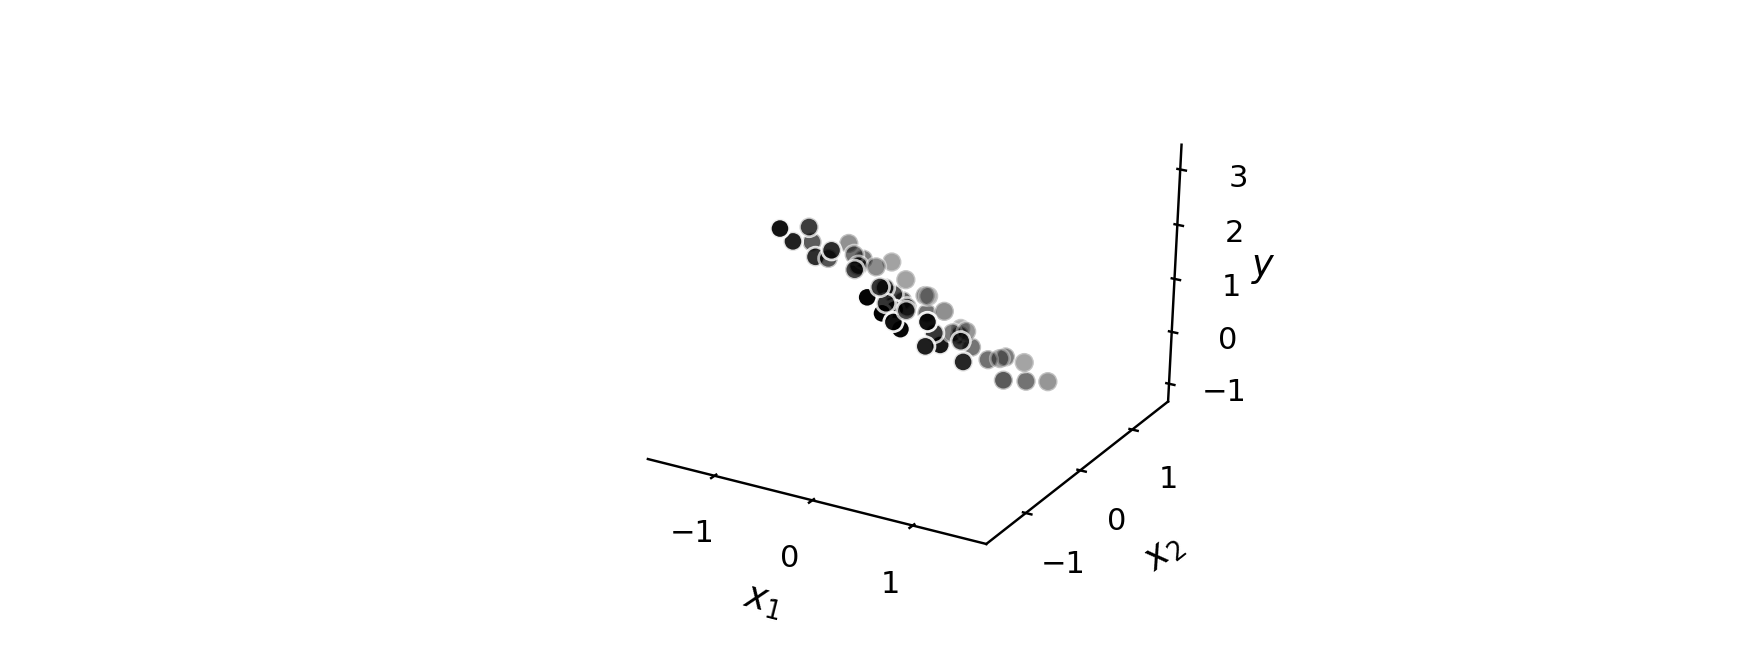

In [4]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/3d_linregress_data.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# create instance of linear regression demo, used below and in the next examples
demo2 = superlearn.lin_regression_demos.Visualizer(data)

# plot dataset
demo2.plot_data()

To fit the Least Squares cost function we must re-define it to accept higher dimensional input.  We do this in the next Python cell.

In [5]:
# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
x = data[:,:-1]    # define input of dataset prior to function definition
y = data[:,-1]    # define output of dataset prior to function definition
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        a_p = w[0] + sum([a*b for a,b in zip(w[1:],x_p)])
        cost +=(a_p - y_p)**2
    return cost

In the next Python cell we minimize the Least Squares cost using the unnormalized gradient descent, a constant steplength value $\alpha = 0.001$ for 100 iterations beginning at the point

$$\begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix}$$  

In [6]:
# declare an instance of our current our optimizers
opt = superlearn.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_hist = opt.gradient_descent(g = least_squares,w = [1,1,1],max_its = 100,alpha = 10**-3)

Now we animate this descent run.  Since the linear model in this case has 3 parameters we cannot visualize each step on the contour / surface of the cost function itself, and thus must use a cost function plot (first introduced in our series on *mathematical optimization*) to keep visual track of the algorithm's progress.

In the left panel below we show the dataset, along with the hyperplane defined by $y = w_0 + x_1w_1 + x_2w_2$ whose weights are given at the current step in the gradient descent run.  In the right panel the corresponding cost function value which plots the evaluation of each step up to the current one.  Pushing the slider from left to right animates the run from start to finish - updating corresponding hyperplane in the left panel as well as cost function value in the right at each step (both of which simultaneously colored green at the start of the run, and gradually fade to red as the run ends).

As can be seen while pushing the slider to the right, as the minimum of the cost function is neared the corresponding weights provide a better and better fit to the data - with the best fit occurring at the end of the run (at the point closest to the minimum).


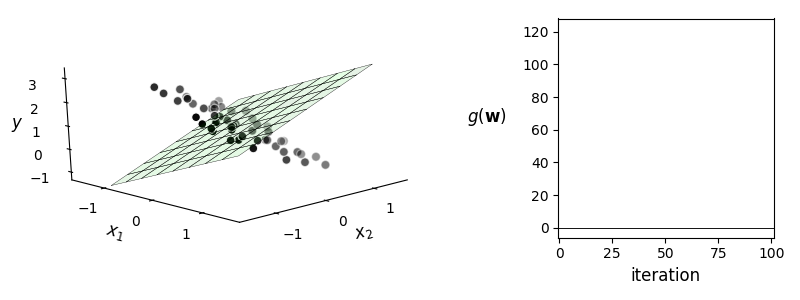
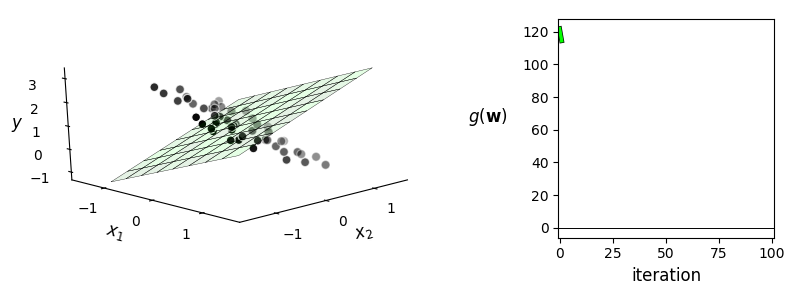
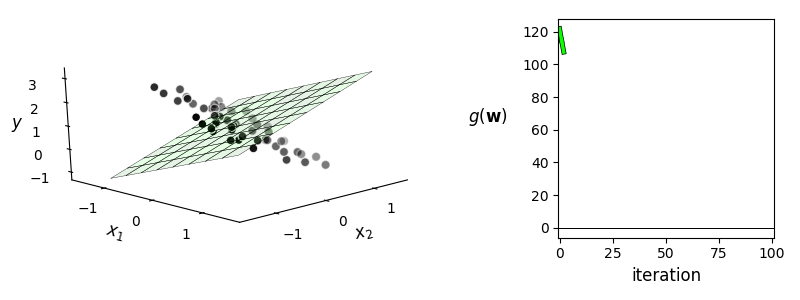
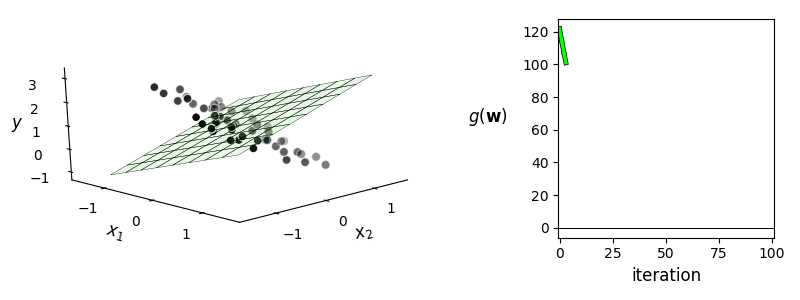
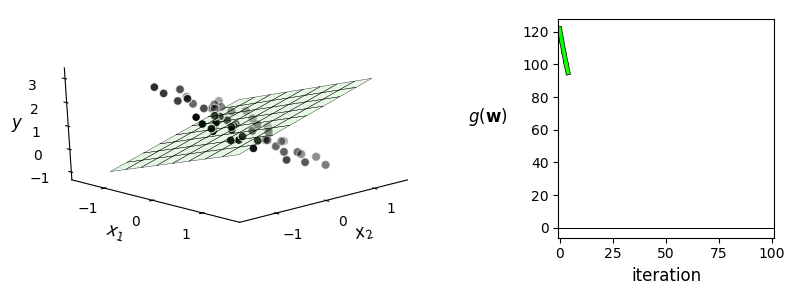
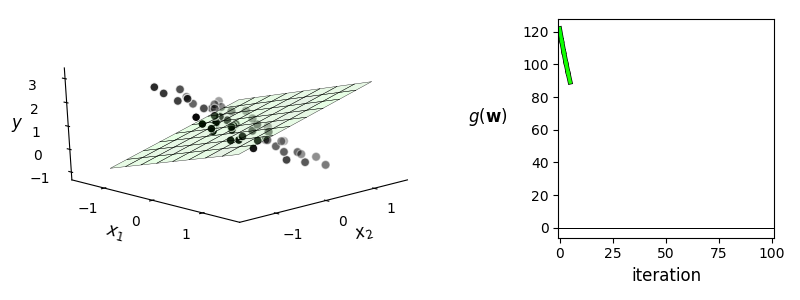
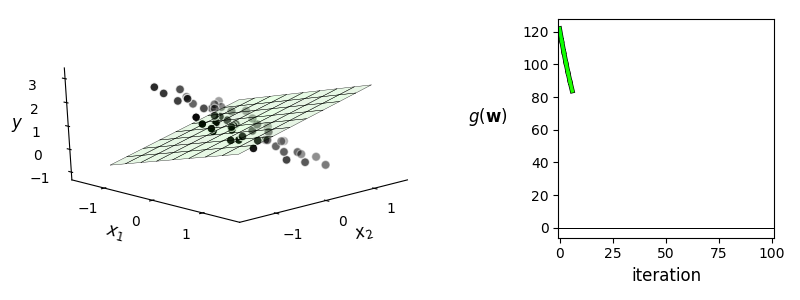
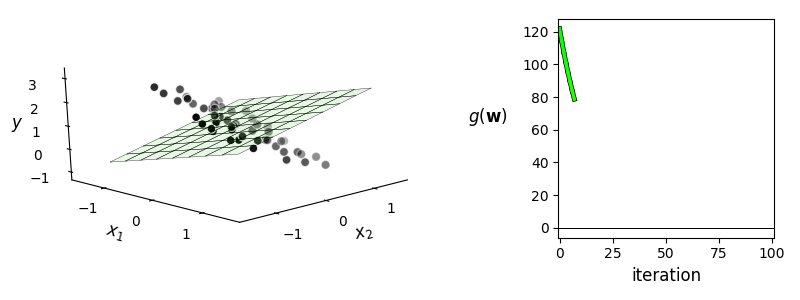
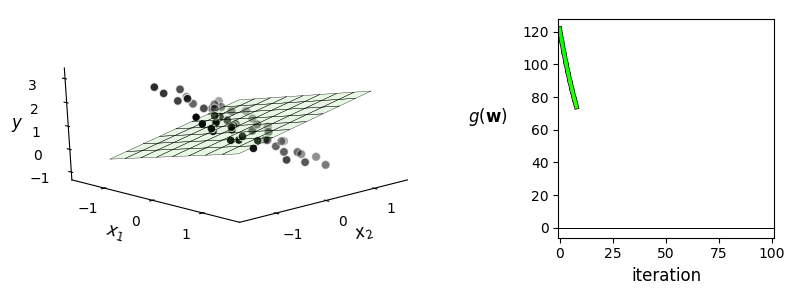
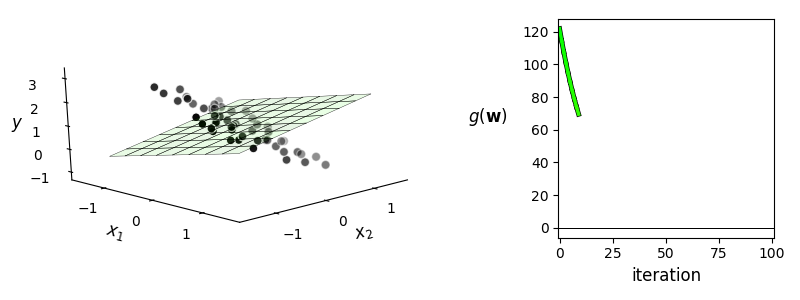
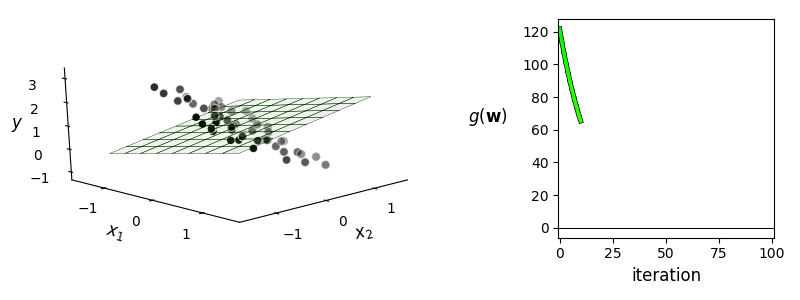
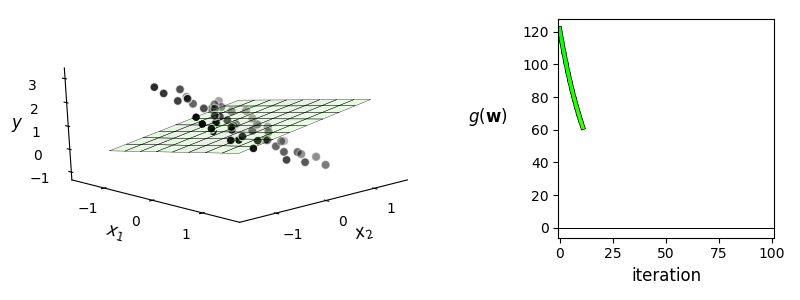
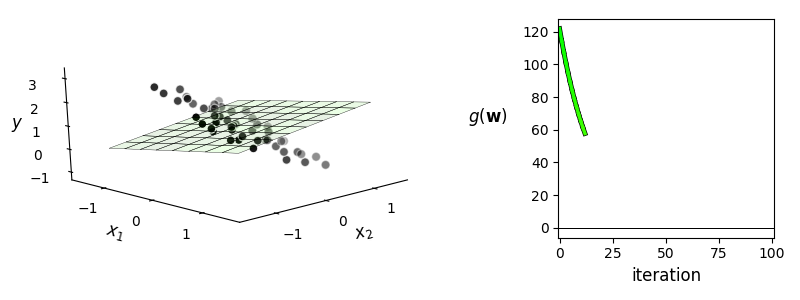
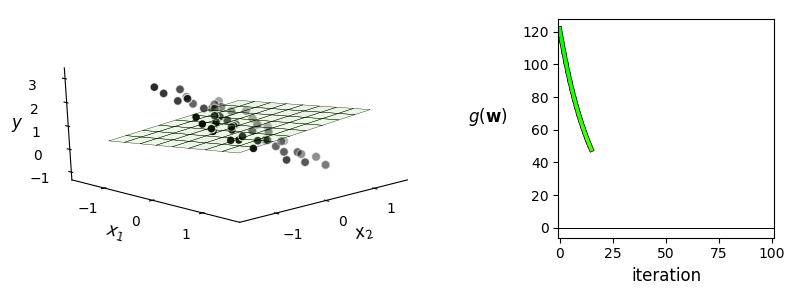
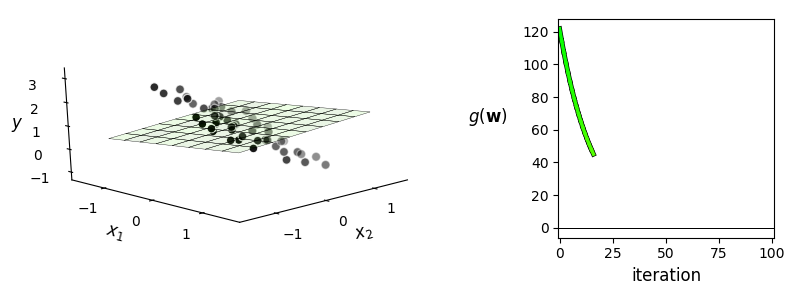
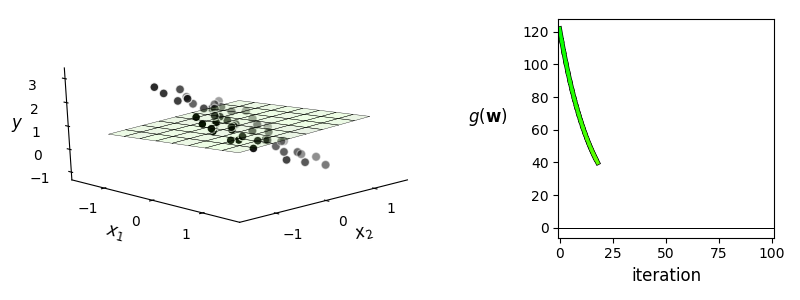
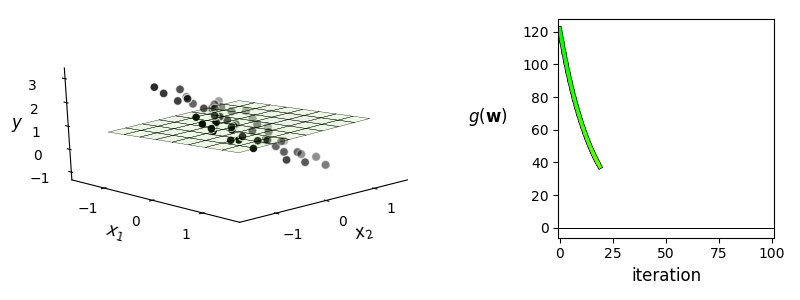
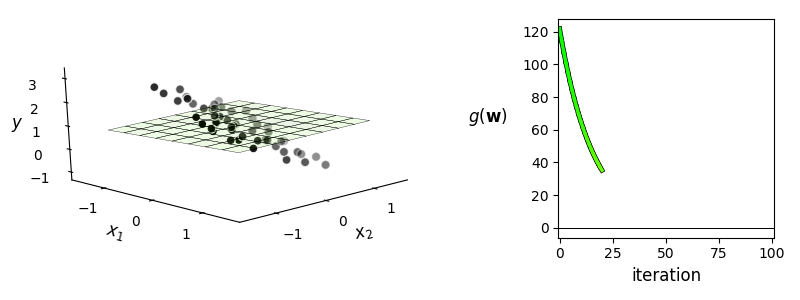
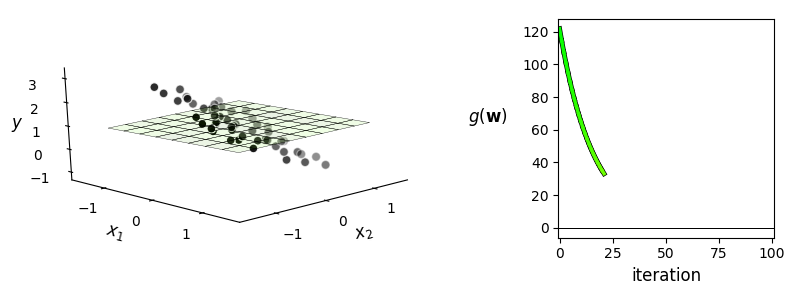
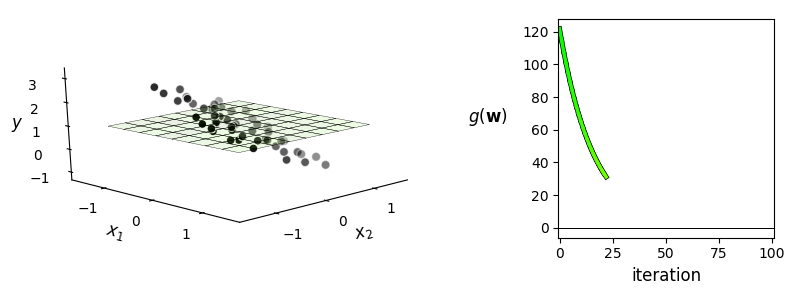
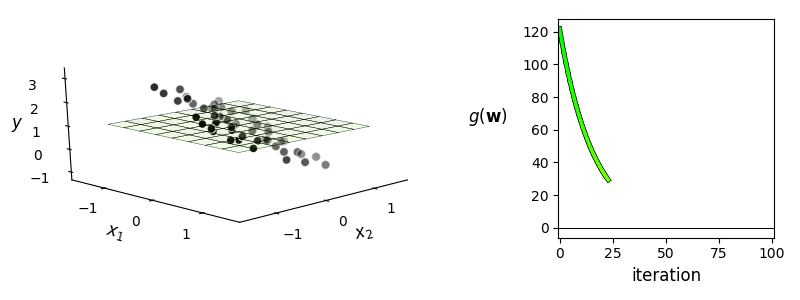
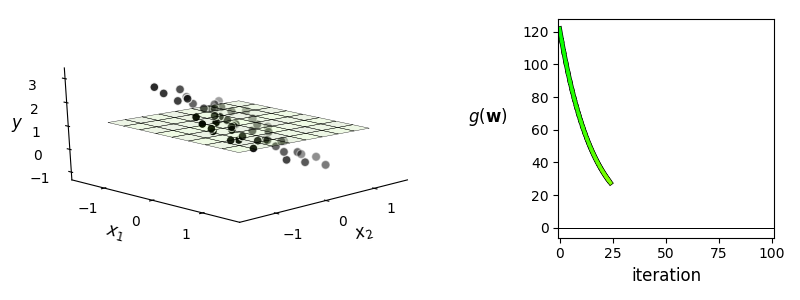
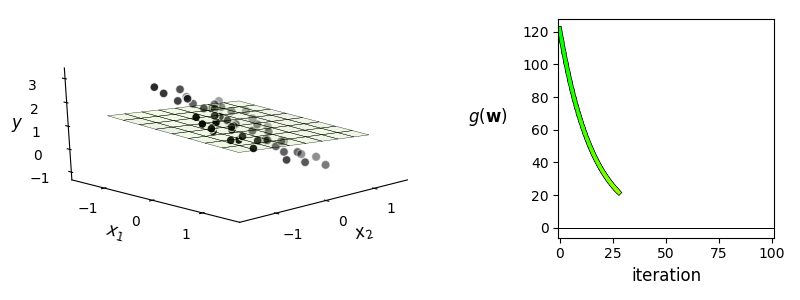
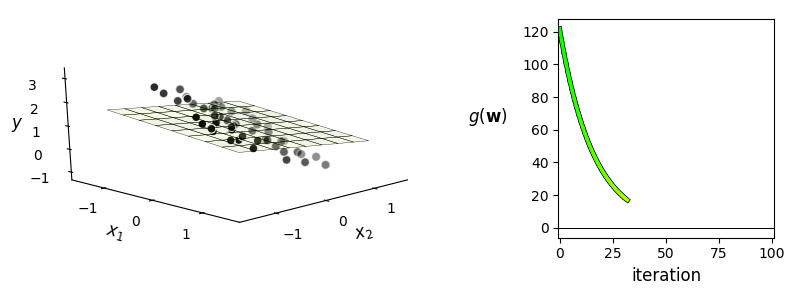
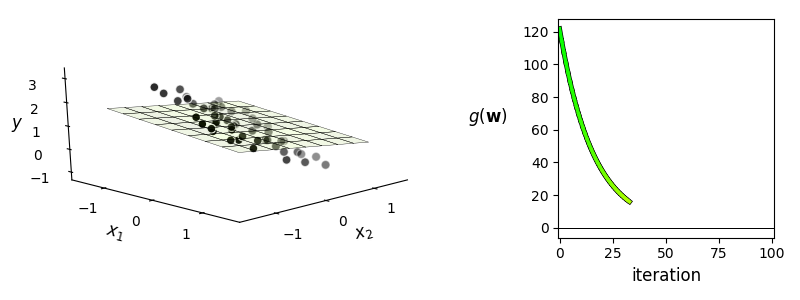
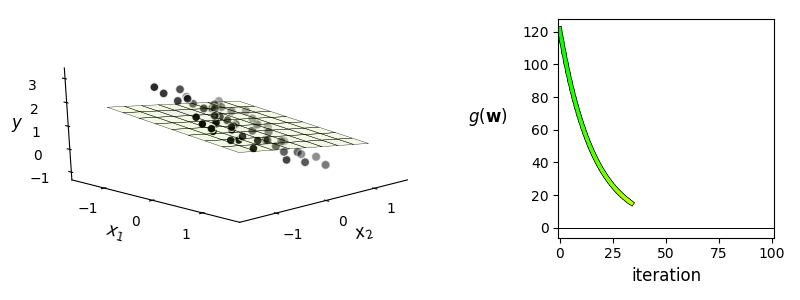
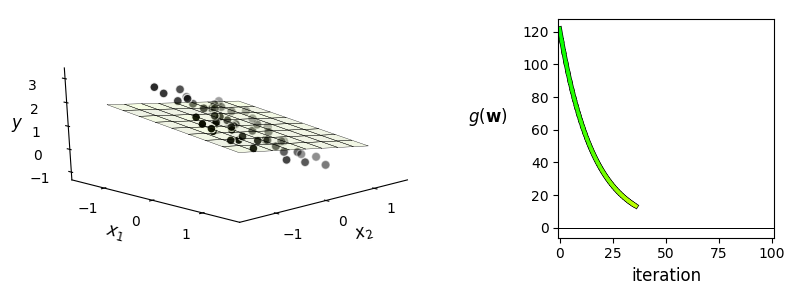
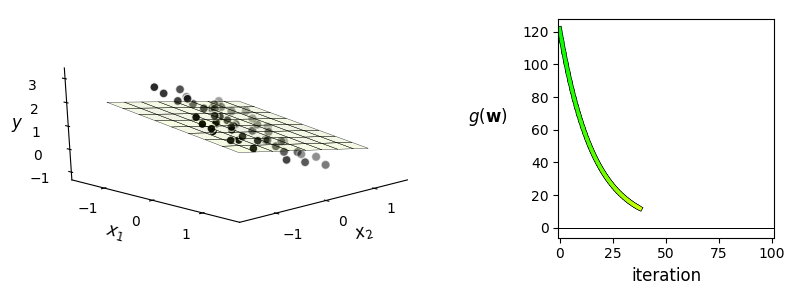
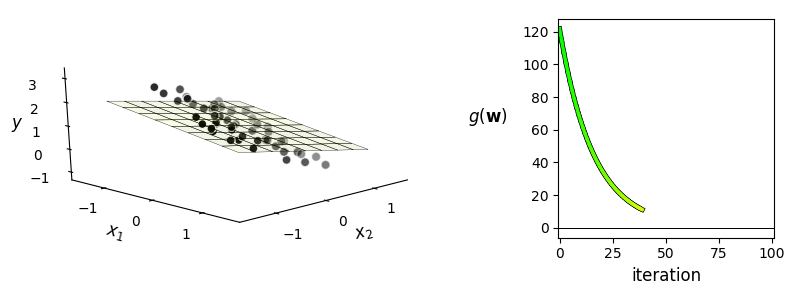
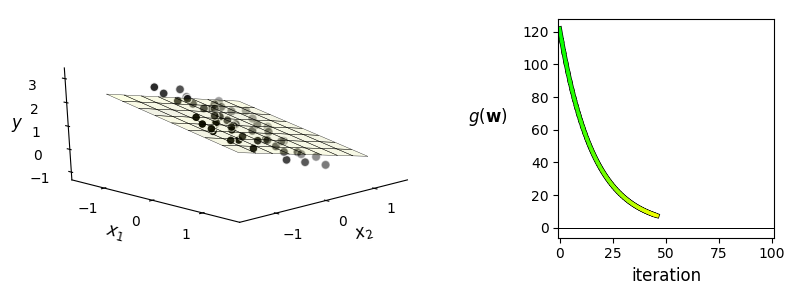
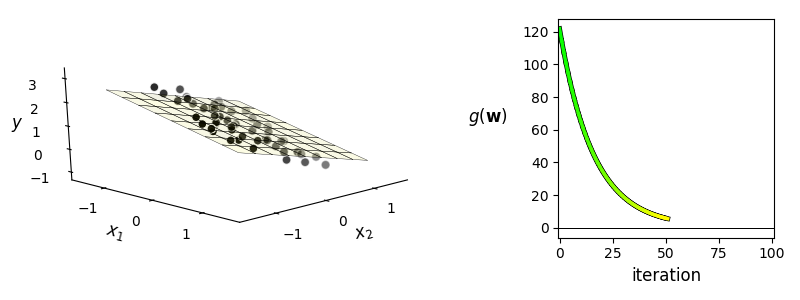
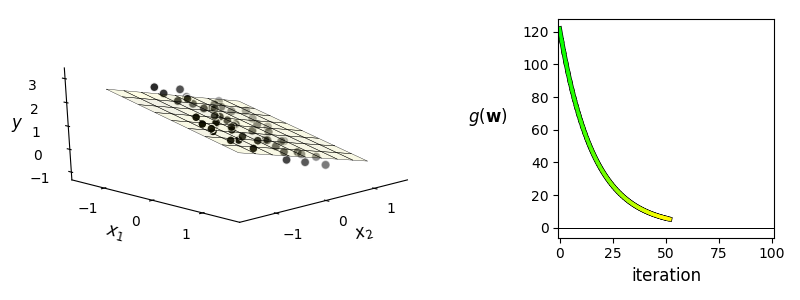
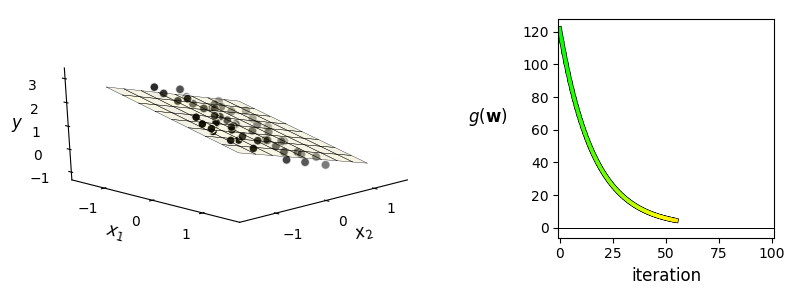
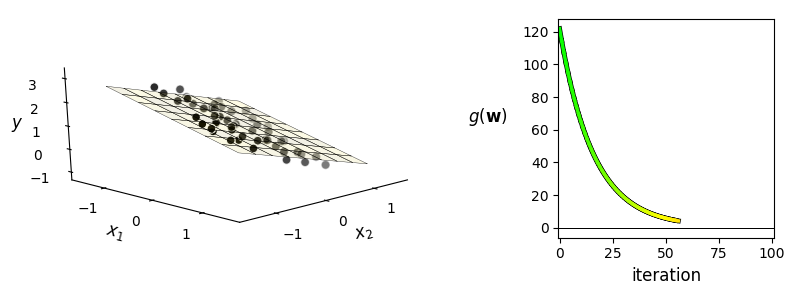
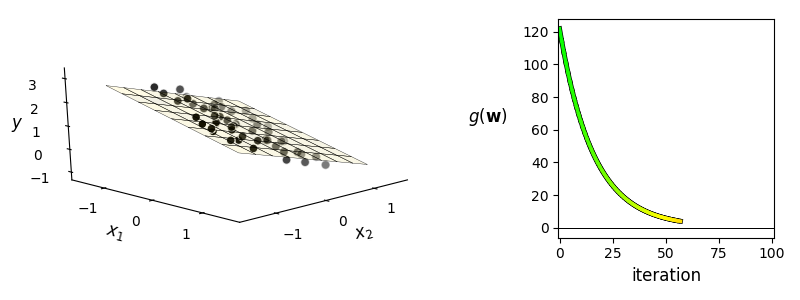
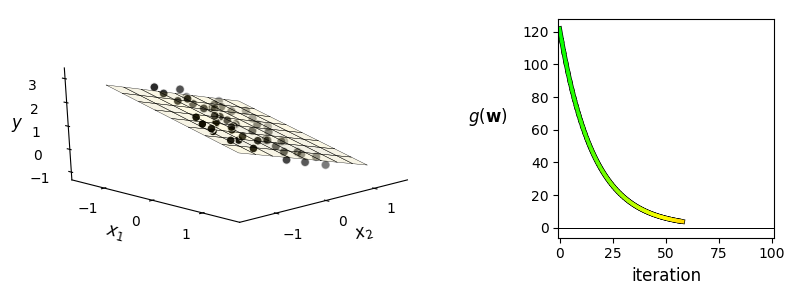
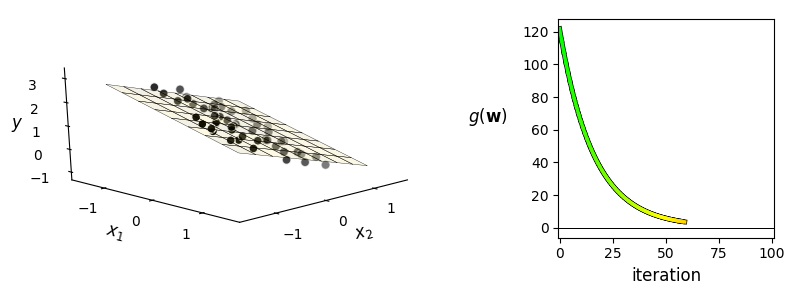
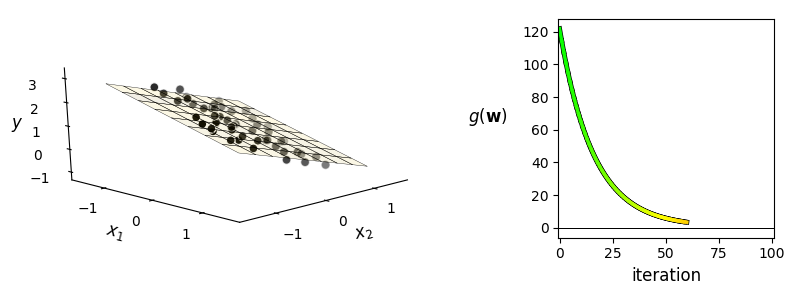
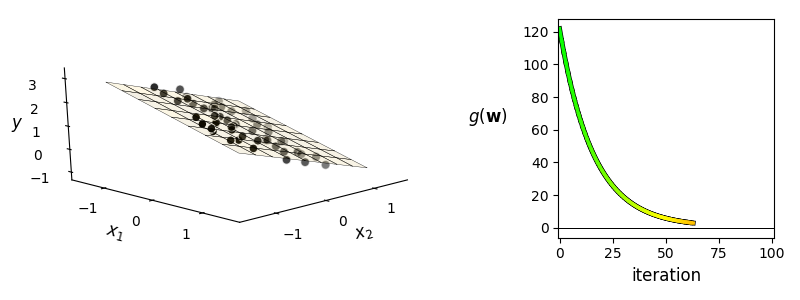
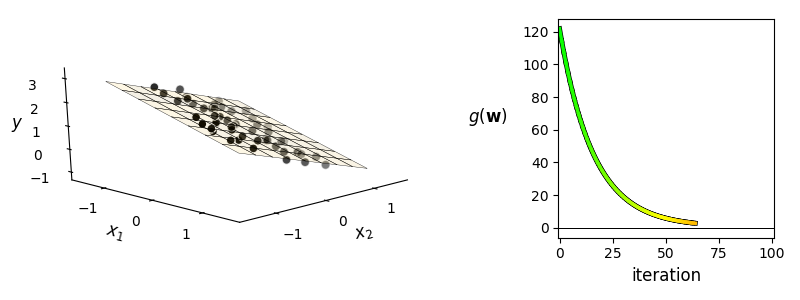
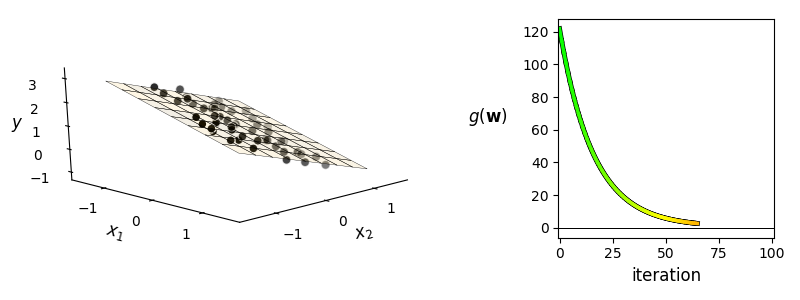
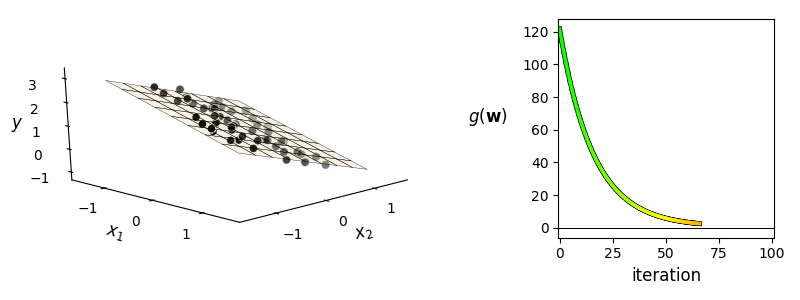
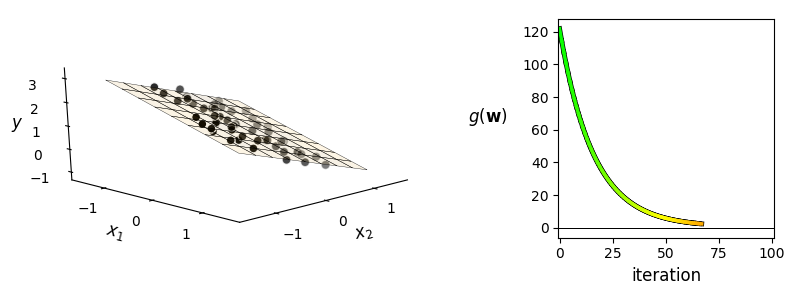
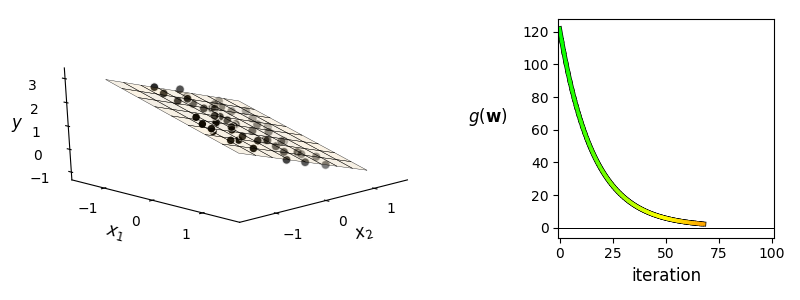
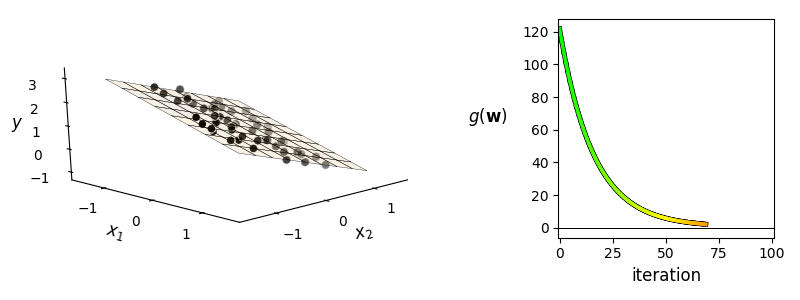
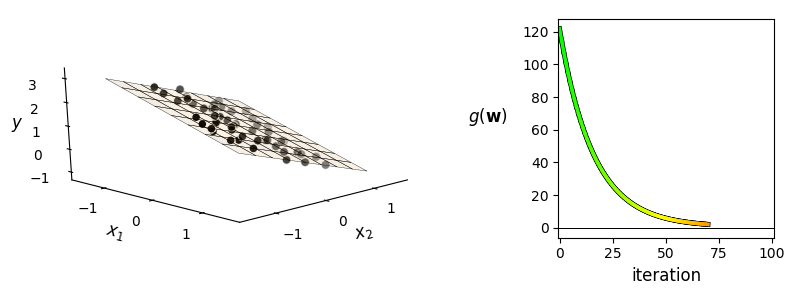
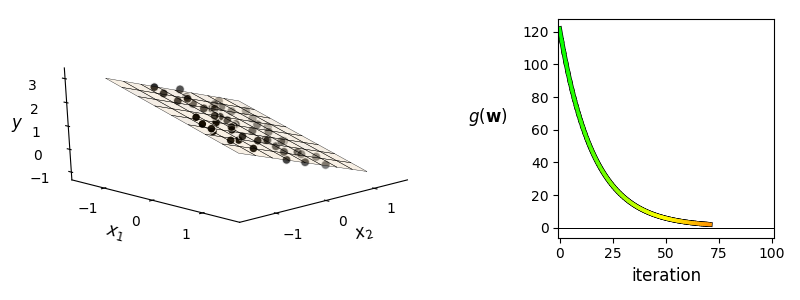
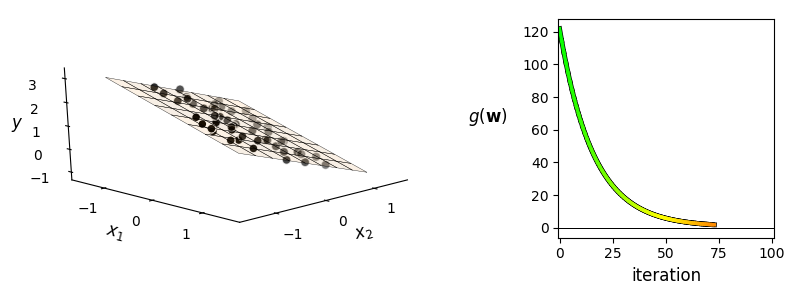
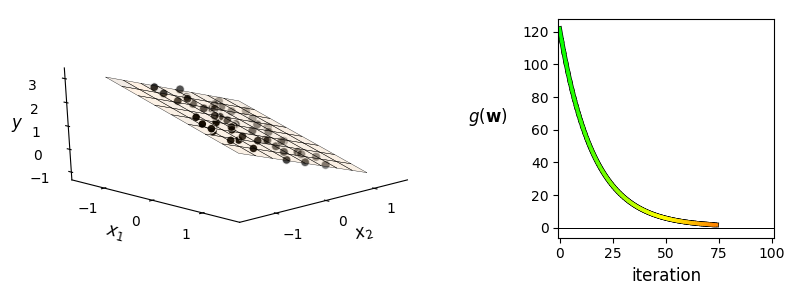
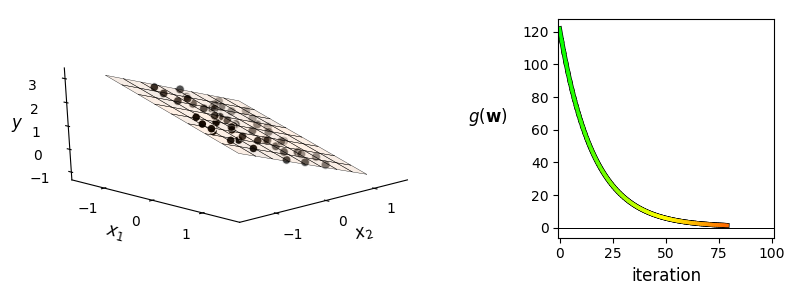
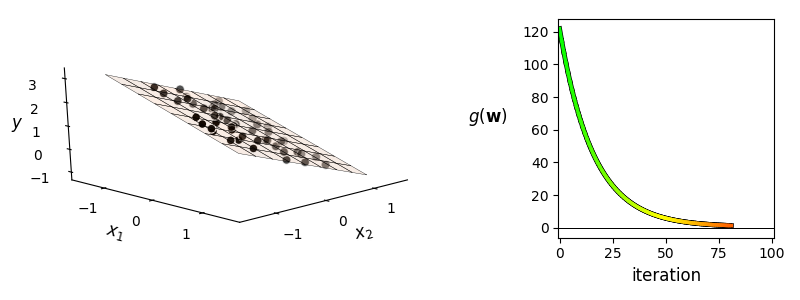
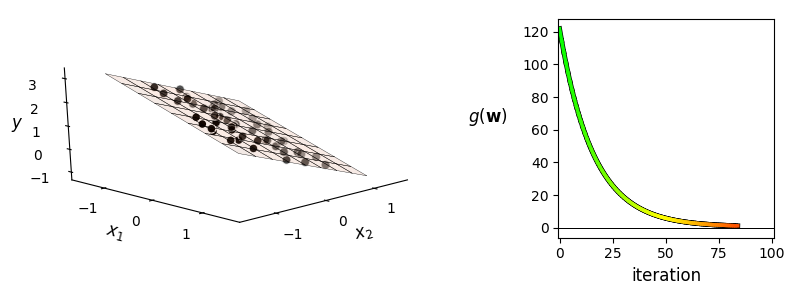
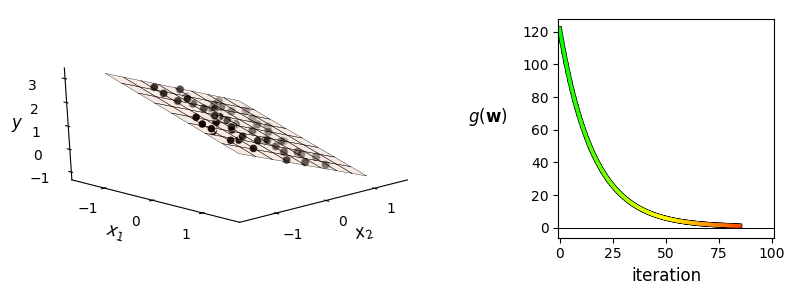
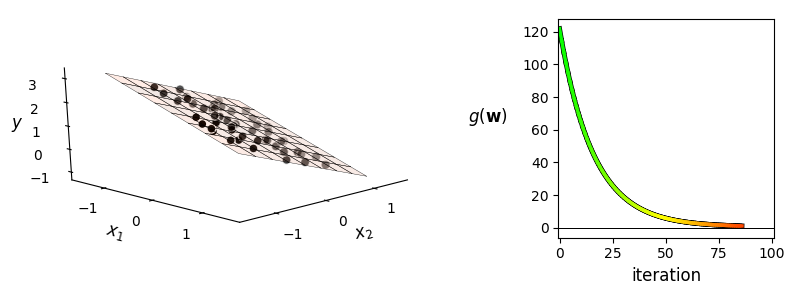
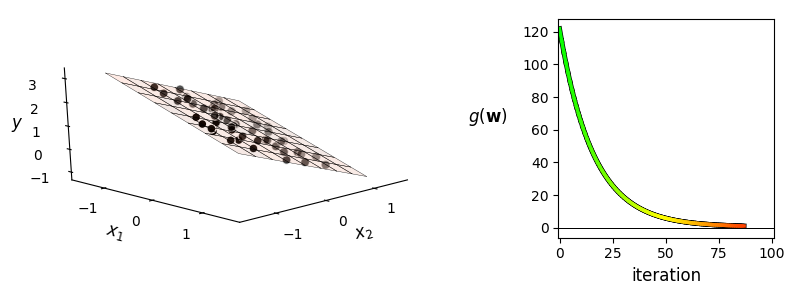
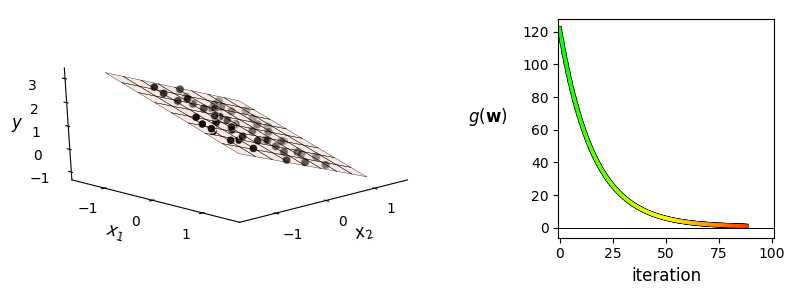
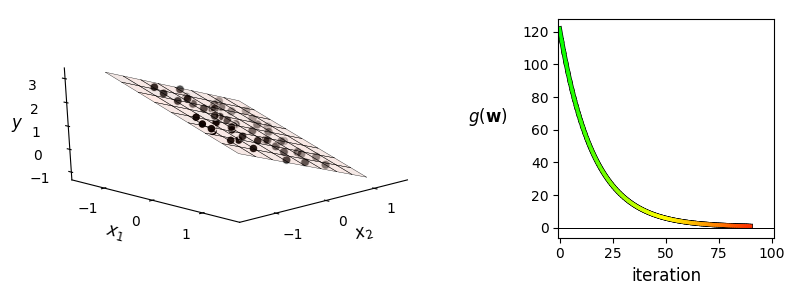
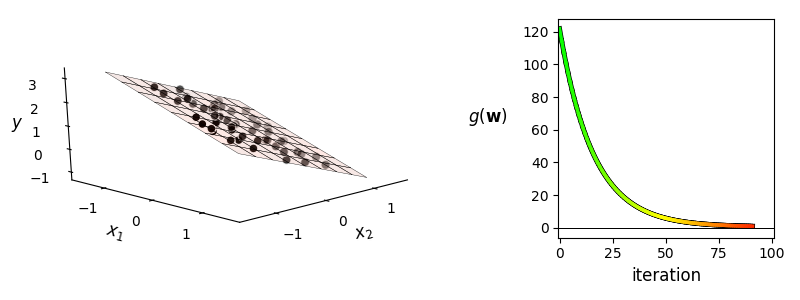
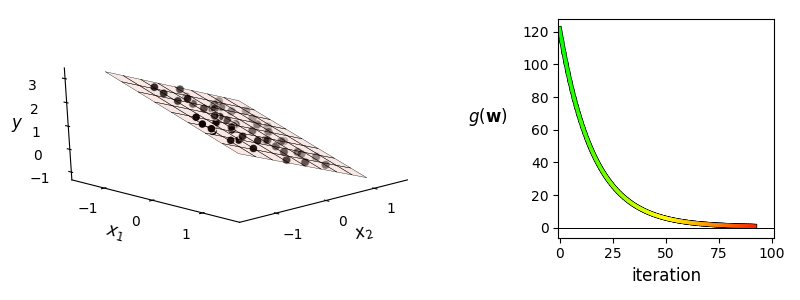
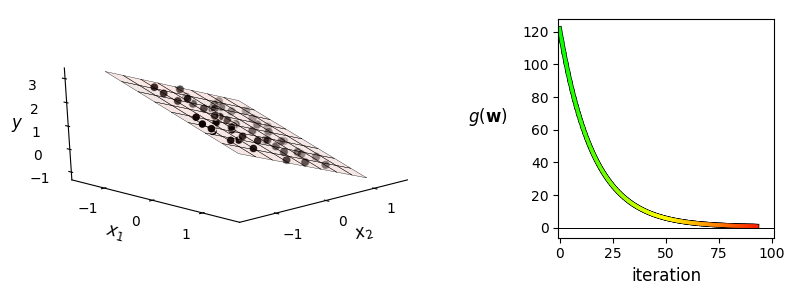
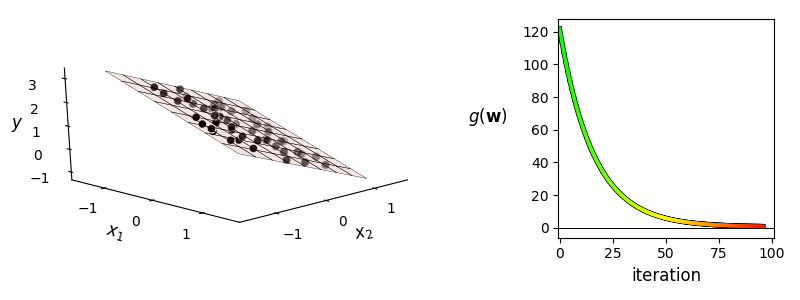
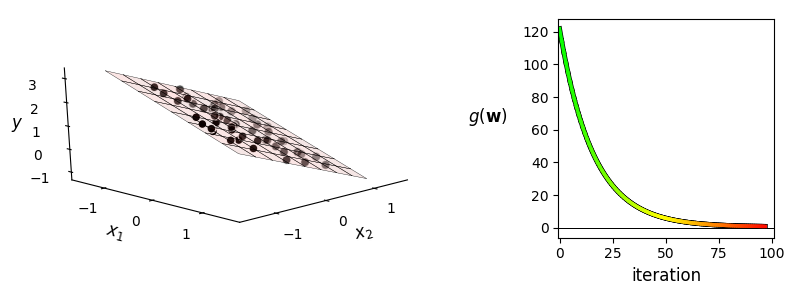

In [7]:
# animate descent process
demo2.animate_it_3d(w_hist,view = [10,-40],viewmax = 1.3)

## 1.4  The efficacy of a learned model

Once we have successfully minimized the Least Squares cost function for linear regression there are a number of ways of measuring the quality of a linear model's fit to the data.  If we denote the optimal set of weights found as $w_0^{\star}$ and $\mathbf{w}^{\star}$, then we can compute the average error - commonly called the *mean squared error (or MSE)* - on the dataset by simply computing the average fit of the model to our dataset as

\begin{equation}
\text{MSE}=\frac{1}{P}\underset{p=1}{\overset{P}{\sum}}\left(w_0^{\star}+\mathbf{x}_{p}^{T}\mathbf{w}^{\star}-y_{p}^{\,}\right)^{2}
\end{equation}

When possible it is also a good idea to compute the MSE of a learned regression model on a set of new testing data, i.e., data that was not used to learn the model itself, to provide some assurance that the learned model will perform well on future data points. This is explored in further detail in a later post in this Series.

## 1.5 Predicting the value of new input data

With optimal parameters $w_0^{\star}$ and $\mathbf{w}^{\star}$, found by minimizing the Least Squares cost, we can predict the output $y_{\textrm{new}}$ of a new input feature $\mathbf{x}_{\textrm{new}}$ by simply plugging the new input into the tuned linear model and estimating
the associated output as 

\begin{equation}
y_{\textrm{new}}^{\,}=w_0^{\star}+\mathbf{x}_{\textrm{new}}^{T}\mathbf{w}^{\star}
\end{equation}

This is illustrated pictorially on a toy dataset for the case when $N=1$ in the Figure below.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/Fig_3_5_new.png' width="50%" height="50%" alt=""/>
  <figcaption>   
<strong>Figure 4:</strong> <em>  Once a line/hyperplane
has been fit to a dataset via minimizing the Least Squares cost function
it may be used to predict the output value of future input. Here a
line has been fit to a two dimensional dataset in this manner, giving
optimal parameters $w_0^{\star}$ and $w_1^{\star}$, and the output value
of a new point $x_{\textrm{new}}$ is made using the learned linear
model as $y_{\textrm{new}}=w_0^{\star}+x_{\textrm{new}}w_1^{\star}$. </em>  </figcaption> 
</figure>

## 1.6 Linear regression from a probabilistic perspective* 

As we saw in Subsection 1.1, we built our linear regression model on the fundamental assumption that the relationship between input and output variables is (approximately) linear. That is, we have for all $P$ input/output pairs of data that $w_0+\mathbf{x}_{p}^T\mathbf{w} \approx y_{p}$. Denoting the difference between $y_p$ and $w_0+\mathbf{x}_{p}^T\mathbf{w}$ as $\varepsilon_p$, we can replace these *approximate* equalities with *exact* equalities of the form

\begin{equation}
w_0+\mathbf{x}_{p}^T\mathbf{w} +\varepsilon_p = y_{p} ,\quad p=1,...,P
\end{equation}

where $\varepsilon_p$'s can be interpreted as error or noise in the data. With this new notation, the Least Squares cost for linear regression can be written, in terms of $\varepsilon_p$'s, as  

$$
\,g\left(w_0,\mathbf{w}\right) = \sum_{p=1}^{P} \varepsilon_p^2
$$

Put into words, with linear regression we aim to find the parameters $w_0$ and $\mathbf{w}$ that minimize the total squared noise - a quantity that is referred to as *the noise energy* in signal processing contexts.

Now one might rightfully ask: what is the point of introducing $P$ new variables $\left\{ \varepsilon_p \right\} _{p=1}^{P}$ to our model when their values are unknown to begin with? While it is true that we do not know the exact $\varepsilon_p$ values, we can nonetheless make assumptions about their distribution that enable us to find $w_0$ and $\mathbf{w}$ (and $\varepsilon_p$'s successively) in a probabilistic framework. Specifically we make the assumption that

**1. $\left\{ \varepsilon_p \right\} _{p=1}^{P}$ are drawn from a zero-mean Gaussian distribution.** In other words, we assume that the noise is normally distributed with an *expected value* of $0$. Before getting into why this assumption is necessary to make from a theoretical standpoint, let us examine its validity using a number of real regression datasets.  

#### <span style="color:#a50e3e;">Example 6: </span>  Global sea levels are rising!

In the Python cell below we plot both the Least Squares trend line fit to a dataset [[1]](#bib_cell) consisting of satellite measurements of global mean sea level changes on earth from 1993 to 2014 (left panel), as well as the estimated noise distribution according to the learned trend line (right panel).   

<IPython.core.display.Javascript object>


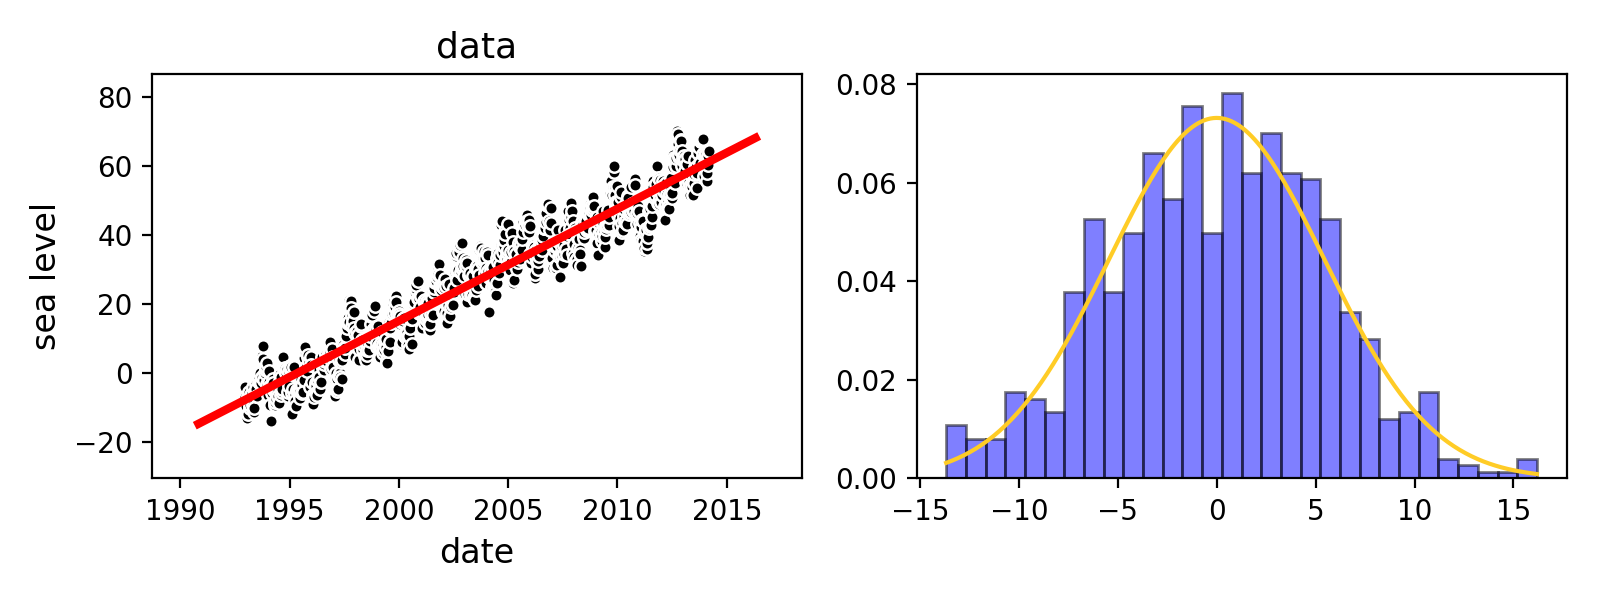

In [28]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/climate_data.csv'
data = np.asarray(pd.read_csv(datapath,header = None))
demo1 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve Least Squares 
demo1.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo1.error_hist(num_bins=30, xlabel='date', ylabel='sea level', show_pdf='on')

#### <span style="color:#a50e3e;">Example 7: </span> The relationship between the height of mother and the height of daughter 

As another example let us look at Francis Galton's height dataset, who collected this data in 1885 in an attempt to explore the relationship between the heights of the parents and the heights of their adult children. In Python cell below we plot the portion of Galton's dataset [[2]](#bib_cell) which connects the height of the mother (input) to the height of her daughter (output), once again plotted along with the error distribution on the right.  

<IPython.core.display.Javascript object>


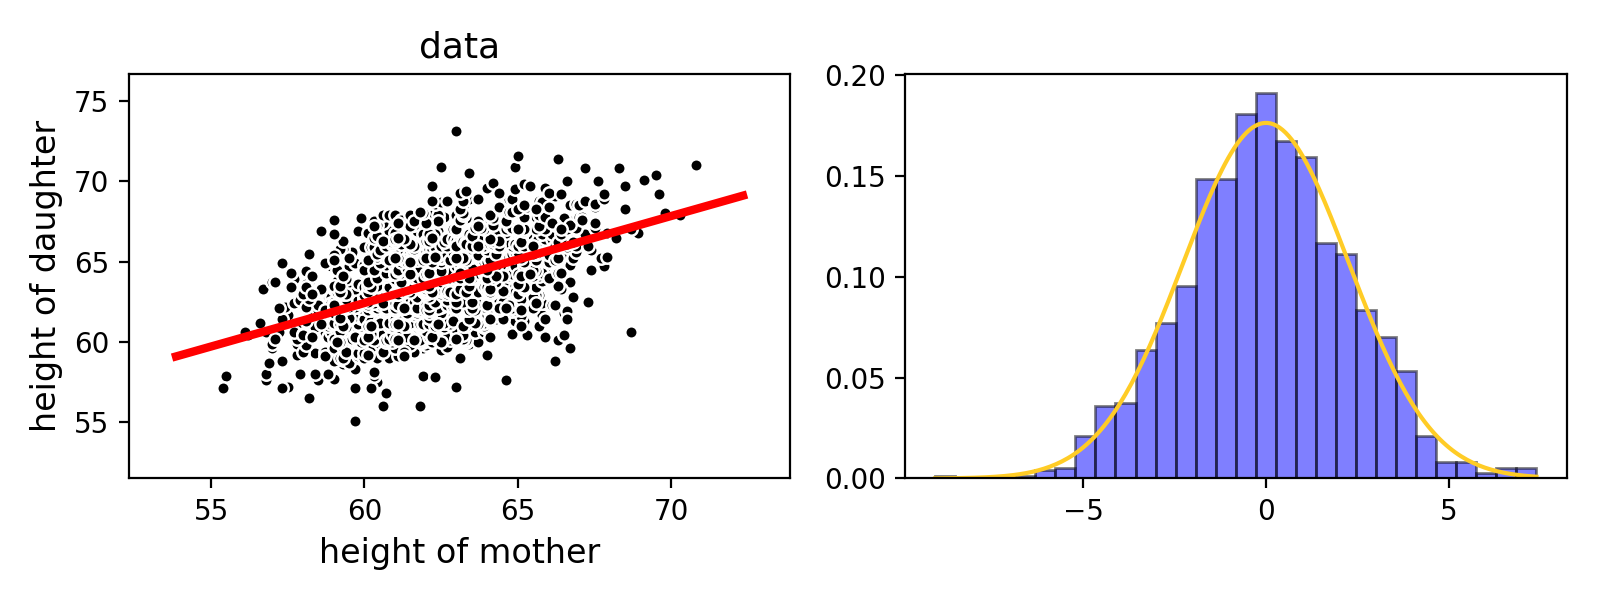

In [30]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/mother_daughter.csv'
data = np.asarray(pd.read_csv(datapath,header = None))
demo2 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve Least Squares
demo2.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo2.error_hist(num_bins = 30, xlabel='height of mother', ylabel='height of daughter', show_pdf='on')

In both cases as you can see it looks like that the noise does follow a zero-mean Gaussian distribution, and hence our assumption is not far-fetched.

Since we have $y_p = w_0+\mathbf{x}_{p}^T\mathbf{w} +\varepsilon_p$ for all $p$, this means that, given the values of $\mathbf{x}_{p}$, $w_0$, and $\mathbf{w}$, each $y_p$ is also Gaussian with the same variance as the noise distribution - which we denote by $\sigma^2$ - and a (shifted) mean value of $w_0+\mathbf{x}_{p}^T\mathbf{w}$. Hence, with our first assumption, we have

\begin{equation}
{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},w_0,\mathbf{w}\right)=\frac{1}{\sqrt{2\pi}\,\sigma}e^{\,\frac{-1}{2\sigma^{2}}\left(y-\left(w_0+\mathbf{x}_{p}^{T}\mathbf{w}\right)\right)^{2}} ,\quad p=1,...,P
\end{equation}

This brings us to the second theoretical assumption we make here, that

**2. $\left\{ y_p \right\} _{p=1}^{P}$ are statistically independent of each other.** In many cases it makes intuitive sense to assume that our observations are (or can be) made independently of one another other, as long as there is no temporal, spatial, or other kind of correlation in the data. 

With these two assumptions we can now form the (joint) likelihood of our data and maximize it to recover model parameters.  Specifically, using the independence assumption we can write the likelihood as

\begin{equation}
{\cal L}=\prod_{p=1}^{P}{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},w_0,\mathbf{w}\right)
\end{equation}  

Recall, as discussed in our series on *the fundamentals of probability and statistics*, that maximizing the likelihood is mathematically equivalent to minimizing its negative log-likelihood, giving the probabilistic cost function

\begin{equation}
g\left(w_0,\mathbf{w},\sigma\right)=-\sum_{p=1}^{P}\text{log}\,{\cal P}\left(y=y_{p}\,|\,\mathbf{x}_{p},w_0,\mathbf{w}\right)
\end{equation}  

to be minimized over $w_0$, $\mathbf{w}$, and the noise standard deviation $\sigma$. 

Our first assumption on the distribution of noise makes it possible to write the exact form of $g$, with some algebra, as 

\begin{equation}
g\left(\widetilde{\mathbf{w}},\sigma\right)=P\,\text{log}\left(\sqrt{2\pi}\,\sigma\right)+\frac{1}{2\sigma^{2}}\sum_{p=1}^{P} \left(y_p-\widetilde{\mathbf{x}}_{p}^{T}\widetilde{\mathbf{w}}\right)^{2}
\end{equation}  

where we have used the notation 

\begin{equation}
\widetilde{\mathbf{w}}=\left[\begin{array}{c}
w_{0}\\
\mathbf{w}
\end{array}\right]
\,\,\,\,\text{and}\,\,\,\,\,
\widetilde{\mathbf{x}}_{p}=\left[\begin{array}{c}
1\\
\mathbf{x}_{p}
\end{array}\right]
\end{equation}

to write $g$ more compactly.

Checking the first order condition for optimality we have

$$
\begin{array}{c}
\nabla_{\widetilde{\mathbf{w}}}g\left(\widetilde{\mathbf{w}},\sigma\right)= \frac{1}{\sigma^{2}}\sum_{p=1}^{P} \mathbf{x}_p\left(y_p-\widetilde{\mathbf{x}}_{p}^{T}\widetilde{\mathbf{w}}\right)=\mathbf{0}\\
\frac{\partial}{\partial\sigma}g\left(\widetilde{\mathbf{w}},\sigma\right)= \frac{P}{\sigma}-\frac{1}{\sigma^{3}}\sum_{p=1}^{P} \left(y_p-\widetilde{\mathbf{x}}_{p}^{T}\widetilde{\mathbf{w}}\right)^{2}=0
\end{array}
$$

The first equation gives the linear system 

\begin{equation}
\left(\sum_{p=1}^{P} \widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T \right) \widetilde{\mathbf{w}}_{\,}^{\,} =  \sum_{p=1}^{P} \widetilde{\mathbf{x}}_p^{\,} y_p^{\,}
\end{equation}

whose solution $\widetilde{\mathbf{w}}^\star$ can be used in the second equation to find the optimal value for the noise variance, as

\begin{equation}
\sigma^2 = \frac{1}{P}\sum_{p=1}^{P} \left(y_p-\widetilde{\mathbf{x}}_{p}^{T}\widetilde{\mathbf{w}}^{\star}\right)^{2}
\end{equation}

Note that the linear system characterizing the fit here is identical to what we derived previously in Subsection 1.3, where interestingly enough, we found the same solution through minimizing the Least Squares cost and without making any of the statistical assumptions made here.   

> The maximum likelihood solution derived here using the assumptions on noise distribution and independence of data is identical to the Least Squares solution derived previously from a geometric perspective.

Even though it was necessary to assume a Gaussian distribution on the noise in order to re-derive the Least Squares solution from a probabilistic perspective, in practice we can still use Least Squares on datasets where the noise distribution is not necessarily Gaussian.   

#### <span style="color:#a50e3e;">Example 8: </span> Least Squares and uniformly distributed noise

In the Python cell below we create a simulated dataset with uniformly distributed noise and fit a Least Squares line to it as we did previously in Examples 6 and 7. As you can see, the Least Squares solution still provides a good fit to the data even though the assumption of Gaussian distribution on noise is not met. The right panel here shows the distribution of noise (according to the learned Least Squares fit), which is visibly not Gaussian.

In [47]:
# make and load a simulated dataset with uniformly distributed noise
num_pts = 200
x = np.random.rand(num_pts)
y = 4*x + np.random.rand(num_pts) 
x.shape = (len(x),1)
y.shape = (len(y),1)
data = np.concatenate((x,y),axis = 1)
demo3 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve Least Squares
demo3.run_algo(algo='newtons_method', w_init = np.random.randn(2,1), max_its = 1)

# visualize results
demo3.error_hist(num_bins = 30)

<IPython.core.display.Javascript object>

## 1.7 Appendix

In this brief Section we provide derivations which (i) confirm that the Least Squares cost function for linear regression is always convex and (ii) compute its analytical Lipschitz constant. As detailed in our *series on mathematical optimization* the latter value provides a conservative lower bound on the magnitude of fixed steplength values one should try out with gradient descent.  

### Proof that the Least Squares cost function is convex

To show that the Least Squares cost function for linear regression is convex we can use the fact that it is a quadratic as indicated in Example 4 above.  There we mentioned that, when written in quadratic form, the matrix generating the corresponding quadratic can be written as $\mathbf{A} = \sum_{p=1}^{P}\widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T$.  From our post on quadratic functions and eigenvalues in our *series on the vital elements of calculus*, to show that this quadratic is convex we can just show that the eigenvalues of this matrix are all nonnegative.  Furthermore, we know that the smallest eigenvalue of any square symmetric matrix $\mathbf{A}$ is given as the minimum of the *Rayleigh quotient* (as detailed in our post on unconstrained optimality conditions in the *vital elements of calculus* series), i.e., the smallest value taken by 

\begin{equation}
\widetilde{\mathbf{w}}^T \mathbf{A} \widetilde{\mathbf{w}}^{\,}
\end{equation}

for any unit-length vector $\widetilde{\mathbf{w}}$. Substituting in the particular form of $\mathbf{A}$ here we have

\begin{equation}
\widetilde{\mathbf{w}}^T\left(\sum_{p=1}^{P}\widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T \right) \widetilde{\mathbf{w}}^{\,} =  \sum_{p=1}^{P}\left(\widetilde{\mathbf{w}}^T\widetilde{\mathbf{x}}_{p}^{\,}\right)\left( \widetilde{\mathbf{x}}_{p}^T \widetilde{\mathbf{w}}^{\,} \right) = \sum_{p=1}^{P}\left(\widetilde{\mathbf{w}}^T\widetilde{\mathbf{x}}_{p}^{\,}\right)^2
\end{equation}

Since each term in the summand is squared, the sum must be nonnegative. Therefore the minimum eigenvalue of the Least Squares cost (quadratic) function is nonnegative, and it is therefore convex.

### Computation of the Lipschitz constant 

Since we have just seen that the cost function is convex in order to compute a Lipschitz constant we can simply compute the largest eigenvalue of the matrix $\mathbf{A} = \sum_{p=1}^{P}\widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T$.  This is precisely given as the *2-norm* of this matrix, squared

\begin{equation}
L = \left\Vert \sum_{p=1}^{P}\widetilde{\mathbf{x}}_p^{\,}\widetilde{\mathbf{x}}_p^T\right\Vert_2^2
\end{equation}

which one can compute via e.g., the *power method*.

For a larger but easier to compute Lipschitz constant one can use the trace of the matrix $\mathbf{A}$, since this equals the sum of all eigenvalues, which in this case must be larger than its maximum value since all eigenvalues are non-negative.

<a id='bib_cell'></a>

### Data sources

[1] RS Nerem, DP Chambers, C Choe, and GT Mitchum. Estimating mean sea level change from the topex and jason altimeter missions. Marine Geodesy, 33(S1):435–446, 2010.

[2] Data taken from https://www.statcrunch.com/5.0/shareddata.php?keywords=Galton